# Preparation

We will need the solution from Week 4 (Extra credit), and to prepare a test and training dataset.

##Recreate dataset from Week 4 (Extra Credit)

Solution below from Week 3 assignment.  Note that as required in the assignment, we remove the prior temperature reading.


In [1]:
# You will need the shared Google drive https://drive.google.com/drive/u/1/folders/0ALmMMRrzz_-5Uk9PVA
from google.colab import drive
drive.mount("/content/drive")
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-S22/Data/data602.py ./datashim
from datashim import data602

Mounted at /content/drive


You can use your solution from Week 4 (Extra Credit), or use the transformed CSV file saved together with this template.  The below code imports the CSV file that is produced from the posted Week 4 (Extra Credit) solution.  **The prior temp column is removed from the CSV file, and the data is scaled.**

In [2]:
import pandas as pd
wdf = pd.read_csv("/content/drive/Shareddrives/DS602-S22/Homework/Assignments/Week 8/weather_clean.csv")
wdf

,date,cosday,sinday,costime,sintime,wnd_speed,precip,cloudcover,precip_intensity,dateint,tstorm,winter,mist,fog,temp
0,2015-12-31 20:54:00-05:00,0.688355,-0.725374,0.999852,-0.017213,0.192308,0.0,0.8,0.0,0.000000,0.0,0.0,0.0,0.0,6.1
1,2015-12-31 21:54:00-05:00,0.852640,-0.522499,0.999852,-0.017213,-0.192308,0.0,0.8,0.0,0.000021,0.0,0.0,0.0,0.0,6.7
2,2015-12-31 22:54:00-05:00,0.958820,-0.284015,0.999852,-0.017213,0.000000,0.0,0.8,0.0,0.000041,0.0,0.0,0.0,0.0,6.1
3,2015-12-31 23:54:00-05:00,0.999657,-0.026177,0.999852,-0.017213,-0.192308,0.0,0.8,0.0,0.000062,0.0,0.0,0.0,0.0,5.6
4,2016-01-01 00:54:00-05:00,0.972370,0.233445,1.000000,0.000000,-0.192308,0.0,0.8,0.0,0.000082,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48553,2021-07-16 15:54:00-04:00,-0.522499,-0.852640,-0.973118,-0.230306,0.769231,0.0,0.4,0.0,0.999918,0.0,0.0,0.0,0.0,36.7
48554,2021-07-16 16:54:00-04:00,-0.284015,-0.958820,-0.973118,-0.230306,0.576923,0.0,0.4,0.0,0.999938,0.0,0.0,0.0,0.0,35.6
48555,2021-07-16 17:54:00-04:00,-0.026177,-0.999657,-0.973118,-0.230306,0.576923,0.0,0.6,0.0,0.999959,0.0,0.0,0.0,0.0,33.3
48556,2021-07-16 18:54:00-04:00,0.233445,-0.972370,-0.973118,-0.230306,0.384615,0.0,0.4,0.0,0.999979,0.0,0.0,0.0,0.0,32.8


In [3]:
y = wdf.pop('temp').values
X = wdf.drop('date', 1).values # drop date field from features matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


## Prepare test and training datasets

Note: After running the above code, `xt` and `y` store $\mathbf{X}$ and $\mathbf{y}$, respectively.

In [4]:
from sklearn.linear_model import (LinearRegression, ElasticNetCV, RidgeCV)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import xgboost
from xgboost import XGBRegressor 
from statistics import mean

In [5]:
from sklearn.model_selection import (train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Problem 1: Regressors

Build at least 3 regressors using different algorithms to predict the temperature.  At least one regressor should implement a tree-based algorithm (random forest, or gradient boosted tree/xgboost.)

In [6]:
#test=10000                         ## initially trained with 10000 samples
#X_Sample,y_Sample=X_train[:test], y_train[:test]

In [7]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
print('Linear Regression',lr.score(X_train,y_train))

Linear Regression 0.788249903337154


In [9]:
random_forest = RandomForestRegressor(n_jobs = 2,n_estimators = 200, max_features = 'log2')
random_forest.fit(X_train,y_train)

RandomForestRegressor(max_features='log2', n_estimators=200, n_jobs=2)

In [10]:
print('Random Forest',random_forest.score(X_train,y_train))

Random Forest 0.9909828724075915


In [11]:
xgb = xgboost.XGBRegressor(subsample = 1,n_estimators = 300, max_depth = 5)
xgb.fit(X_train,y_train)

[21:22:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, n_estimators=300)

In [12]:
print('XGB Regressor:',xgb.score(X_train,y_train))

XGB Regressor: 0.9506288991783625


# Problem 2: Cross-Validation

Use cross-validation to test each algorithm, and select the estimator with the highest accuracy score.

In [13]:
cross_LR=cross_validate(lr, X_train, y_train,return_estimator=True,cv=5,verbose=5)

[CV] END ......................................., score=0.787 total time=   0.0s
[CV] END ......................................., score=0.795 total time=   0.0s
[CV] END ......................................., score=0.788 total time=   0.0s
[CV] END ......................................., score=0.789 total time=   0.0s
[CV] END ......................................., score=0.781 total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [14]:
cross_rf=cross_validate(random_forest, X_train, y_train, return_estimator=True,cv=5,verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ......................................., score=0.925 total time=   9.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


[CV] END ......................................., score=0.931 total time=   8.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.6s remaining:    0.0s


[CV] END ......................................., score=0.929 total time=   8.7s
[CV] END ......................................., score=0.930 total time=   8.8s
[CV] END ......................................., score=0.925 total time=   8.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.8s finished


In [15]:
cross_xgb=cross_validate(xgb, X_train, y_train, return_estimator=True,cv=5,verbose=3)

[21:23:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ......................................., score=0.940 total time=   9.3s
[21:23:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s remaining:    0.0s


[CV] END ......................................., score=0.943 total time=   7.5s
[21:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.7s remaining:    0.0s


[CV] END ......................................., score=0.943 total time=   7.4s
[21:24:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END ......................................., score=0.944 total time=   7.5s
[21:24:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END ......................................., score=0.941 total time=   7.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   39.3s finished


In [16]:
import numpy as np
print("Accuracy for Linear Regression:",np.max(cross_LR["test_score"]))
print("Accuracy for Random Forest:",np.max(cross_rf["test_score"]))
print("Accuracy for XGB:",np.max(cross_xgb["test_score"]))

Accuracy for Linear Regression: 0.7952138773583007
Accuracy for Random Forest: 0.9311217083064743
Accuracy for XGB: 0.9443360969877477


### Maximum Accuracy is for XGB : 0.944336096

# Problem 3: Most important features
Use one of the tree-based models to evaluate feature importance.  Which features are the most important?

In [17]:
imp_features=random_forest.feature_importances_
imp_features

array([3.83972572e-02, 4.42593737e-02, 5.73542864e-01, 1.49564598e-01,
       3.04912111e-02, 4.08145289e-03, 3.99426845e-02, 3.88166416e-03,
       1.04234251e-01, 6.82316334e-04, 6.78017117e-03, 3.68058896e-03,
       4.61566807e-04])

In [26]:
columns=["sinday","cosday","sintime","costime","wnd_speed","precip","cloudcover", "precip_intensity","tstorm", "winter","mist", "fog","temp"]

In [27]:
df=pd.DataFrame({"Values":columns,"Importance":imp_features})
df

,Values,Importance
0,sinday,0.038397
1,cosday,0.044259
2,sintime,0.573543
3,costime,0.149565
4,wnd_speed,0.030491
5,precip,0.004081
6,cloudcover,0.039943
7,precip_intensity,0.003882
8,tstorm,0.104234
9,winter,0.000682


In [31]:
df.sort_values(by='Importance',axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,Values,Importance
2,sintime,0.573543
3,costime,0.149565
8,tstorm,0.104234
1,cosday,0.044259
6,cloudcover,0.039943
0,sinday,0.038397
4,wnd_speed,0.030491
10,mist,0.006780
5,precip,0.004081
7,precip_intensity,0.003882


In [34]:
print("Most Important Feature is:",df.iloc[2])

Most Important Feature is:/n Values         sintime
Importance    0.573543
Name: 2, dtype: object


# Problem 4: Residuals Plot
For the best model selected above, show a residuals plot ($\hat{y}$ vs. $\hat{y} - y$).  Does the residuals plot show evidence of uncaptured exploratory information?


In [35]:
y_prediction = cross_val_predict(xgb,X_train, y_train)

[21:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


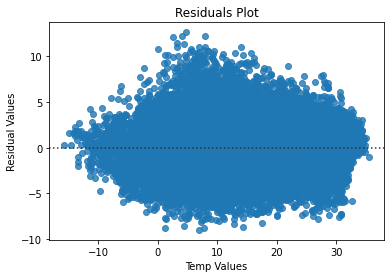

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.residplot(x = y_prediction,y = y_train - y_prediction)
plt.title("Residuals Plot")
plt.xlabel("Temp Values")
plt.ylabel("Residual Values")
plt.show()

# Problem 5: Evaluation
Train the model with the highest accuracy score with the full training dataset.  Score the test data against this model.  Does the model demonstrate predictive validity?

In [37]:
xgb.fit(X_train, y_train)

[21:48:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, n_estimators=300)

In [38]:
print("Score on Test Data:",xgb.score(X_test, y_test))

Score on Test Data: 0.943767701755702
